In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Beams import Beam, Mask, Tilt_beam, Offset_beam
from HHG import ActiveGrating
import Graph



In [12]:
IR1 = Beam(w0=50e-6, lam=800e-9)
IR2 = Beam(w0=50e-6, lam=800e-9)
q = 11
XUV = Beam(w0=1, lam=IR1.lam/q)
HHG = ActiveGrating(qeff=3.5)

theta = 0.05
alpha1 = 0.1
alpha2 = 1

grid_0 = XUV.FocusGrid(Lx=3e-2, Ly=15e-2, Nx=301, Ny=1501, d=1)
IR1 = IR1.GBeam(*grid_0, z=0)
IR2 = IR2.GBeam(*Tilt_beam(*grid_0, z=0, angle=theta))
IRfield = alpha1*IR1 + alpha2*IR2

XUV_NF = HHG.Hq_NearField(IRfield, q)
XUV_FF, grid_FF = XUV.Fraunhofer(XUV_NF, grid_0, d=1)

%matplotlib qt
fig = Graph.ShowHHG(IRfield, XUV_NF, XUV_FF, grid_0, grid_FF)

(-0.005, 0.005)

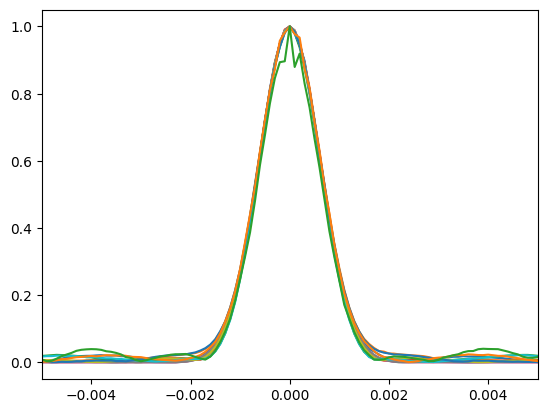

In [9]:
fig2 = Graph.OrdersLineout(XUV_FF, grid_FF, q, theta)
ax = fig2.get_axes()[0]
ax.set_xlim(-5e-3, 5e-3)